In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#load data
data_x = np.load('fractal_reshapeRecPlot_data_x_aumentated_normalized.npy') #images
data_y = np.load('fractal_reshapeRecPlot_data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  1184


In [6]:
VALIDATION_PERCENTAGE = 0.1

In [7]:
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

validation_x = data_x[:validation_size] #taking validation images from original data
validation_y = data_y[:validation_size]
data_x = data_x[validation_size:] #removing validation images from original data
data_y = data_y[validation_size:]

# **Splitting data in train - validation - test**

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [10]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [12]:
adam = tf.keras.optimizers.Adam(lr=0.001)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
def define_model():
    K.set_image_data_format('channels_last')
    K.set_learning_phase(1)
    model = tf.keras.applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
        pooling=None,
        classes=NUM_CLASSES,
        # classifier_activation="softmax",
        # **kwargs
    )
    new_model = models.Sequential()
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
    new_model.add(tf.keras.layers.Activation('softmax'))
    return new_model

In [14]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
epochs = 100
num_classes = 2
num_kfold=1
all_models = []

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
23/23 - 19s - loss: 1.9757 - accuracy: 0.5197 - val_loss: 14.6130 - val_accuracy: 0.2444 - 19s/epoch - 845ms/step
Epoch 2/100
23/23 - 8s - loss: 1.4475 - accuracy: 0.7324 - val_loss: 13.6133 - val_accuracy: 0.2444 - 8s/epoch - 350ms/step
Epoch 3/100
23/23 - 8s - loss: 1.2699 - accuracy: 0.8028 - val_loss: 25.3151 - val_accuracy: 0.2444 - 8s/epoch - 350ms/step
Epoch 4/100
23/23 - 8s - loss: 1.0255 - accuracy: 0.8690 - val_loss: 9.2208 - val_accuracy: 0.2444 - 8s/epoch - 350ms/step
Epoch 5/100
23/23 - 8s - loss: 0.9439 - accuracy: 0.8817 - val_loss: 5.9768 - val_accuracy: 0.2444 - 8s/epoch - 349ms/step
Epoch 6/100
23/23 - 8s - loss: 0.7995 - accuracy: 0.9225 - val_loss: 4.7911 - val_accuracy: 0.2444 - 8s/epoch - 349ms/step
Epoch 7/100
23/23 - 8s - loss: 0.7859 - accuracy: 0.8958 - val_loss: 5.8071 - val_accuracy: 0.2444 - 8s/epoch - 349ms/step
Epoch 8/100
23/23 - 8s - loss: 0.7201 - accuracy: 0.9183 - val_loss: 2.7471 - val_accuracy: 0.2444 - 8s/epoch - 350ms/step
Epoch 9/100

23/23 - 8s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9831 - 8s/epoch - 347ms/step
Epoch 68/100
23/23 - 8s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9831 - 8s/epoch - 348ms/step
Epoch 69/100
23/23 - 8s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9831 - 8s/epoch - 348ms/step
Epoch 70/100
23/23 - 8s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9860 - 8s/epoch - 347ms/step
Epoch 71/100
23/23 - 8s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9860 - 8s/epoch - 348ms/step
Epoch 72/100
23/23 - 8s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9860 - 8s/epoch - 348ms/step
Epoch 73/100
23/23 - 8s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9860 - 8s/epoch - 348ms/step
Epoch 74/100
23/23 - 8s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9860 - 8s/epoch - 348ms/step
Epoch 75/100
23/23 - 

INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_1.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_1.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
23/23 - 16s - loss: 2.2014 - accuracy: 0.3108 - val_loss: 2519783702528.0000 - val_accuracy: 0.2310 - 16s/epoch - 702ms/step
Epoch 2/100
23/23 - 8s - loss: 1.7485 - accuracy: 0.3558 - val_loss: 249766464.0000 - val_accuracy: 0.2310 - 8s/epoch - 348ms/step
Epoch 3/100
23/23 - 8s - loss: 1.4059 - accuracy: 0.4487 - val_loss: 2144453.7500 - val_accuracy: 0.2310 - 8s/epoch - 348ms/step
Epoch 4/100
23/23 - 8s - loss: 1.0668 - accuracy: 0.5963 - val_loss: 8822.7129 - val_accuracy: 0.2310 - 8s/epoch - 347ms/step
Epoch 5/100
23/23 - 8s - loss: 0.8445 - accuracy: 0.6892 - val_loss: 25.2590 - val_accuracy: 0.2310 - 8s/epoch - 348ms/step
Epoch 6/100
23/23 - 8s - loss: 0.7722 - accuracy: 0.7103 - val_loss: 1.9509 - val_accuracy: 0.2423 - 8s/epoch - 348ms/step
Epoch 7/100
23/23 - 8s - loss: 0.6194 - accuracy: 0.7764 - val_loss: 2.1596 - val_accuracy: 0.2761 - 8s/epoch - 347ms/step
Epoch 8/100
23/23 - 8s - loss: 0.5680 - accuracy: 0.7820 - val_loss: 2.3150 - val_accuracy: 0.2761 - 8s/epo

Epoch 67/100
23/23 - 8s - loss: 0.0371 - accuracy: 0.9986 - val_loss: 3.9081 - val_accuracy: 0.4676 - 8s/epoch - 347ms/step
Epoch 68/100
23/23 - 8s - loss: 0.0265 - accuracy: 0.9986 - val_loss: 0.3266 - val_accuracy: 0.9155 - 8s/epoch - 348ms/step
Epoch 69/100
23/23 - 8s - loss: 0.0508 - accuracy: 0.9902 - val_loss: 0.7044 - val_accuracy: 0.8141 - 8s/epoch - 348ms/step
Epoch 70/100
23/23 - 8s - loss: 0.0471 - accuracy: 0.9873 - val_loss: 2.2365 - val_accuracy: 0.6254 - 8s/epoch - 348ms/step
Epoch 71/100
23/23 - 8s - loss: 0.0903 - accuracy: 0.9761 - val_loss: 3.3507 - val_accuracy: 0.5183 - 8s/epoch - 348ms/step
Epoch 72/100
23/23 - 8s - loss: 0.0848 - accuracy: 0.9803 - val_loss: 1.1045 - val_accuracy: 0.7014 - 8s/epoch - 349ms/step
Epoch 73/100
23/23 - 8s - loss: 0.1078 - accuracy: 0.9677 - val_loss: 2.1542 - val_accuracy: 0.5634 - 8s/epoch - 351ms/step
Epoch 74/100
23/23 - 8s - loss: 0.1023 - accuracy: 0.9733 - val_loss: 0.2421 - val_accuracy: 0.9324 - 8s/epoch - 352ms/step
Epoch 75

INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_2.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_2.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
23/23 - 16s - loss: 2.0928 - accuracy: 0.3826 - val_loss: 95872368640.0000 - val_accuracy: 0.2620 - 16s/epoch - 684ms/step
Epoch 2/100
23/23 - 8s - loss: 1.4416 - accuracy: 0.5935 - val_loss: 14255317.0000 - val_accuracy: 0.2620 - 8s/epoch - 349ms/step
Epoch 3/100
23/23 - 8s - loss: 1.0387 - accuracy: 0.6835 - val_loss: 207149.8438 - val_accuracy: 0.2620 - 8s/epoch - 349ms/step
Epoch 4/100
23/23 - 8s - loss: 0.8888 - accuracy: 0.7089 - val_loss: 3381.8486 - val_accuracy: 0.2620 - 8s/epoch - 351ms/step
Epoch 5/100
23/23 - 8s - loss: 0.7231 - accuracy: 0.7595 - val_loss: 426.5178 - val_accuracy: 0.2620 - 8s/epoch - 349ms/step
Epoch 6/100
23/23 - 8s - loss: 0.5944 - accuracy: 0.8158 - val_loss: 1.6625 - val_accuracy: 0.2620 - 8s/epoch - 350ms/step
Epoch 7/100
23/23 - 8s - loss: 0.5050 - accuracy: 0.8495 - val_loss: 4.1866 - val_accuracy: 0.2620 - 8s/epoch - 349ms/step
Epoch 8/100
23/23 - 8s - loss: 0.4039 - accuracy: 0.8805 - val_loss: 2.2587 - val_accuracy: 0.2169 - 8s/epoch 

Epoch 67/100
23/23 - 8s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9887 - 8s/epoch - 348ms/step
Epoch 68/100
23/23 - 8s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9887 - 8s/epoch - 348ms/step
Epoch 69/100
23/23 - 8s - loss: 9.4921e-04 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9887 - 8s/epoch - 349ms/step
Epoch 70/100
23/23 - 8s - loss: 9.4027e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9887 - 8s/epoch - 349ms/step
Epoch 71/100
23/23 - 8s - loss: 9.3615e-04 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9887 - 8s/epoch - 349ms/step
Epoch 72/100
23/23 - 8s - loss: 9.1873e-04 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9887 - 8s/epoch - 349ms/step
Epoch 73/100
23/23 - 8s - loss: 9.0263e-04 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9887 - 8s/epoch - 349ms/step
Epoch 74/100
23/23 - 8s - loss: 8.5291e-04 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9887 - 8s/epo

INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_3.npy\assets


INFO:tensorflow:Assets written to: resnet50_100epochs_fractal_augmented_kfold_3.npy\assets


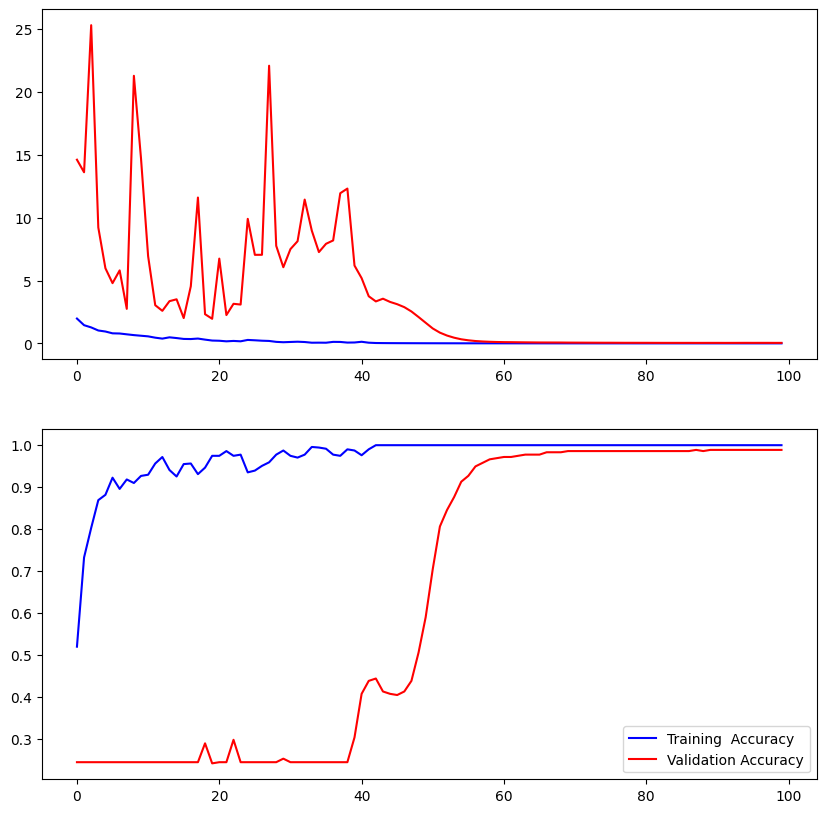

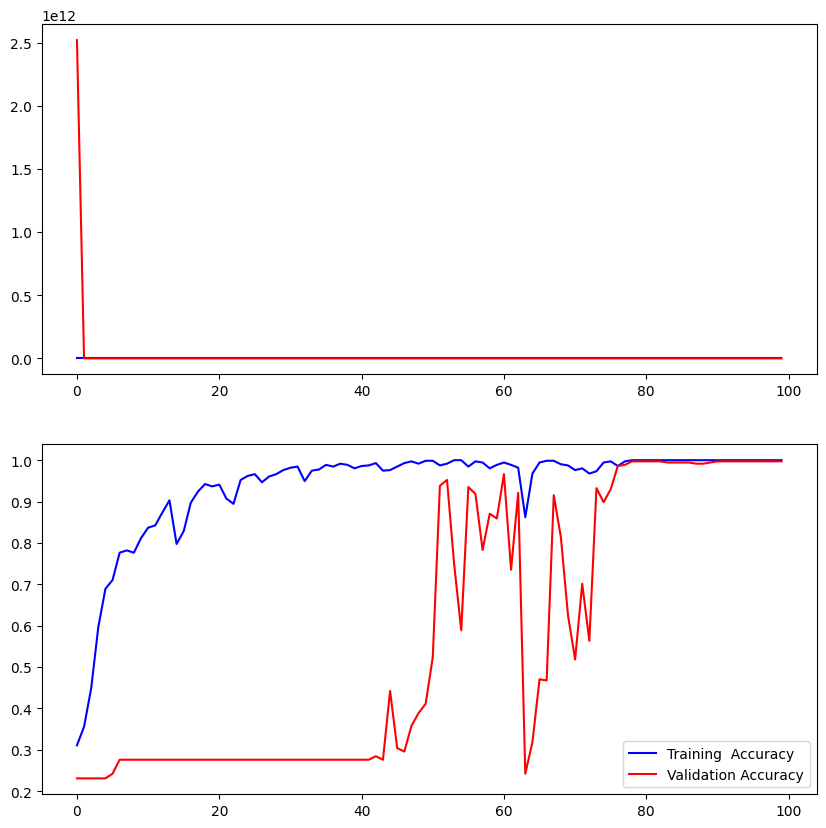

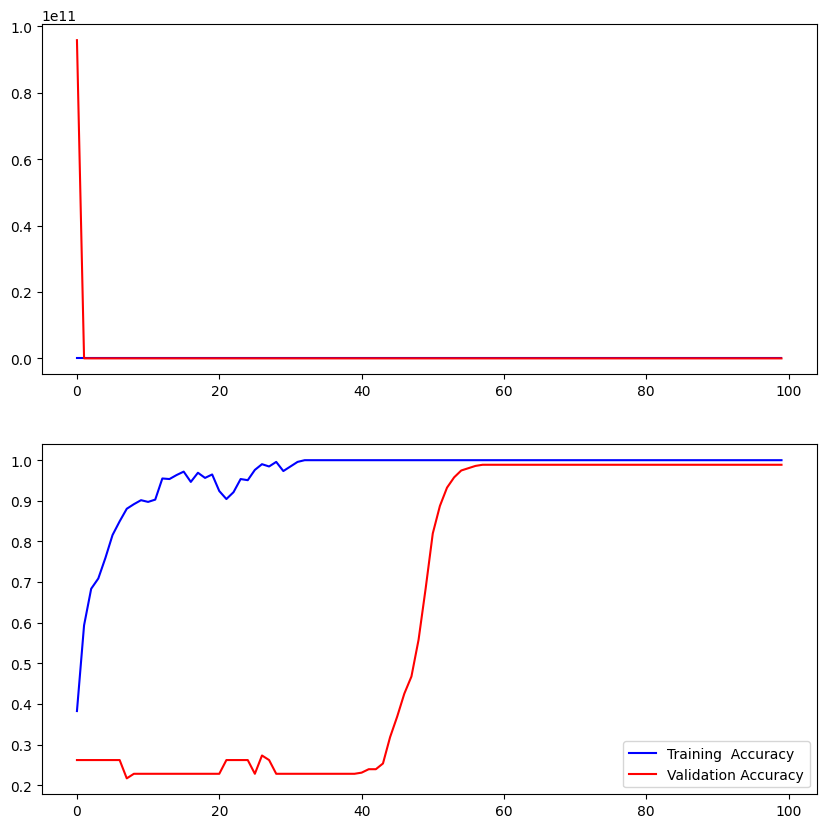

In [15]:
for train, test in kfold.split (data_x, data_y):
    new_model = define_model()

    new_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    history = new_model.fit(data_x[train], data_y[train],
                                epochs=epochs,verbose=2,validation_data=(data_x[test], data_y[test]), shuffle=False)

    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Training  Accuracy')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(validation_x,validation_y,verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save(f'resnet50_100epochs_fractal_augmented_kfold_{str(num_kfold)}.npy')
    all_models.append(new_model)
    num_kfold = num_kfold + 1

In [16]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

98.87% (+/- 0.40%)


**Random forest - flatting**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
cvscores_rf = []
for new_model in all_models:
    new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
    featureVector = new_model_rf.predict(data_x)
    featureVector2 = new_model_rf.predict(validation_x)
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(featureVector,data_y)
    y_pred=clf.predict(featureVector2)
    score = metrics.accuracy_score(validation_y, y_pred)
    cvscores_rf.append(score)
    print("Accuracy:",score)

4/4 [==============================] - 0s 89ms/step
Accuracy: 0.9915254237288136
4/4 [==============================] - 0s 89ms/step
Accuracy: 0.9915254237288136
4/4 [==============================] - 0s 90ms/step
Accuracy: 0.9830508474576272


In [18]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores_rf),np.std(cvscores_rf)))

0.99% (+/- 0.00%)


# **Testes**

In [19]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

NameError: name 'model_trained' is not defined

In [ ]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

In [ ]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
cm = confusion_matrix(test_y, pred_probs)

In [ ]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)